# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

In [3]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

501596.6974415791 -549.8997999045419 0.15138771236589207
4745.08720022405
6051.288177316543
8521.523172190646


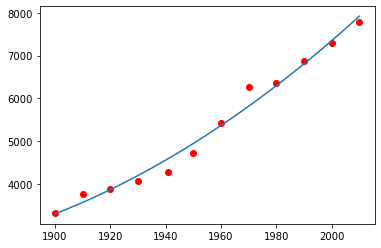

In [2]:
year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
#we choose second order polynomial
B = matrix([ones(n), year, year**2]).T # TRANSPOSE: arrays in numpy are by row by def!!!!!
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
a2 = float(a[2])
print(a0, a1, a2 #5.015966974*10^5 -5.49899998*10^2 1.51387712*10^-1

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x + a2*x**2

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')



print(f(1945))
print(f(1975))
print(f(2020))

-76819.30809744714 42.02023345847857
4910.045979293689
6170.652983048043
8061.563488679574


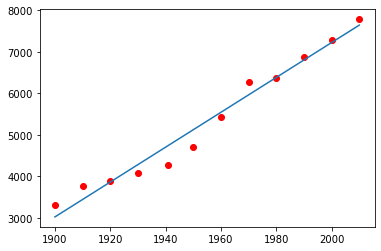

In [10]:
# Try to reimplement the problem changing the order of the polynomial fitting
B = matrix([ones(n), year]).T # TRANSPOSE: arrays in numpy are by row by def!!!!!
BT = B.T

y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a0 = float(a[0])
a1 = float(a[1])
print(a0, a1)

xx = linspace(1900,2010,100)
f = lambda x: a0 + a1*x

_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')

print(f(1945))
print(f(1975))
print(f(2020))

[ 1.51387713e-01 -5.49899801e+02  5.01596699e+05]
4745.087199803384
6051.288177009905
8521.523173360038


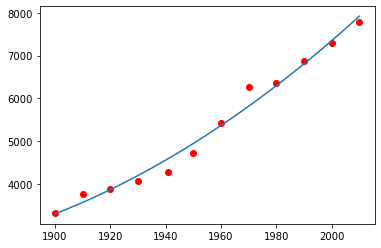

In [9]:
# Try to compare the results with the one obtained with the numpy polynomial fitting tool (polyfit)
a = polyfit(year, population,2) #sympy library: pretty similar to our method
#REVERSE ORDER: a2,a1,a0!
print(a) #1.51387713e-01 -5.49899801e+02  5.01596699e+05
f = poly1d(a) #sympy
_ = plot(xx, f(xx))
_ = scatter(year, population, color='r')

#ATT
# polyfit tells u if the matrix BT is ill posed (when augmenting the order of ppolynomial)

print(f(1945))
print(f(1975))
print(f(2020))